# Example of a Monte Carlo analysis

In [1]:
data = read.csv("data/testdata.csv")

In [2]:
names(data)

[1] "Yield"                        "GDP_agriculture"             
 [3] "Farmer_income"                "Inorganic_F_output"          
 [5] "Large_medium_tractors"        "Small_tractors"              
 [7] "Towing_Farm_Machinery_LM"     "Towing_Farm_Machinery_S"     
 [9] "Electronic_engines"           "Diesel_engines"              
[11] "Combine_harvesters"           "Motorized_threshing_machines"
[13] "Cereal"                       "Beans"                       
[15] "Tubers"                       "Oil"                         
[17] "Sugar"                        "Fiber"                       
[19] "Tobacco"

In [33]:
apply(data, 2, sd)

Yield              GDP_agriculture 
                 3342.595904                 10750.547578 
               Farmer_income           Inorganic_F_output 
                 3536.753028                   627.538129 
       Large_medium_tractors               Small_tractors 
                   22.806965                    77.950530 
    Towing_Farm_Machinery_LM      Towing_Farm_Machinery_S 
                   25.596577                   100.851909 
          Electronic_engines               Diesel_engines 
                   48.272268                    34.349970 
          Combine_harvesters Motorized_threshing_machines 
                    5.082430                    63.726748 
                      Cereal                        Beans 
                   12.736497                     5.459584 
                      Tubers                          Oil 
                    4.535438                     4.810133 
                       Sugar                        Fiber 
                    2.276702                     4.733233 
                     Tobacco 
                    1.373637

In [34]:
apply(data, 2, mean)

Yield              GDP_agriculture 
                6.593468e+03                 1.020145e+04 
               Farmer_income           Inorganic_F_output 
                2.949041e+03                 2.541846e+02 
       Large_medium_tractors               Small_tractors 
                1.169247e+01                 6.360728e+01 
    Towing_Farm_Machinery_LM      Towing_Farm_Machinery_S 
                1.639533e+01                 7.292736e+01 
          Electronic_engines               Diesel_engines 
                4.168466e+01                 2.738436e+01 
          Combine_harvesters Motorized_threshing_machines 
                2.272170e+00                 4.394123e+01 
                      Cereal                        Beans 
                5.646911e+01                 5.377094e+00 
                      Tubers                          Oil 
                5.475737e+00                 7.435225e+00 
                       Sugar                        Fiber 
                1.094793e+00                 2.686446e+00 
                     Tobacco 
                7.165393e-01

In [37]:
apply(data, 2, mean) > apply(data, 2, sd)*2

Yield              GDP_agriculture 
                       FALSE                        FALSE 
               Farmer_income           Inorganic_F_output 
                       FALSE                        FALSE 
       Large_medium_tractors               Small_tractors 
                       FALSE                        FALSE 
    Towing_Farm_Machinery_LM      Towing_Farm_Machinery_S 
                       FALSE                        FALSE 
          Electronic_engines               Diesel_engines 
                       FALSE                        FALSE 
          Combine_harvesters Motorized_threshing_machines 
                       FALSE                        FALSE 
                      Cereal                        Beans 
                        TRUE                        FALSE 
                      Tubers                          Oil 
                       FALSE                        FALSE 
                       Sugar                        Fiber 
                       FALSE                        FALSE 
                     Tobacco 
                       FALSE

In [38]:
covars = c("Farmer_income", "Sugar", "Cereal", "Inorganic_F_output")

In [39]:
summary(data[,c("Yield", covars)])

     Yield       Farmer_income         Sugar              Cereal     
 Min.   : 1575   Min.   :  142.5   Min.   : 0.00000   Min.   :25.94  
 1st Qu.: 4127   1st Qu.:  479.0   1st Qu.: 0.03822   1st Qu.:47.67  
 Median : 5823   Median : 1697.1   Median : 0.20666   Median :58.10  
 Mean   : 6593   Mean   : 2949.0   Mean   : 1.09479   Mean   :56.47  
 3rd Qu.: 8165   3rd Qu.: 3950.2   3rd Qu.: 0.81319   3rd Qu.:65.60  
 Max.   :19237   Max.   :23205.2   Max.   :16.25265   Max.   :92.95  
 Inorganic_F_output
 Min.   :   0.00   
 1st Qu.:  72.04   
 Median : 140.09   
 Mean   : 254.19   
 3rd Qu.: 235.29   
 Max.   :9170.75   

In [40]:
MyModel = lm(as.formula(paste("Yield~", paste(covars, collapse="+"))), data=data)

In [41]:
summary(MyModel)


Call:
lm(formula = as.formula(paste("Yield~", paste(covars, collapse = "+"))), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7097.2 -1402.5  -438.1   894.9  8508.0 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6142.21389  387.24048  15.861  < 2e-16 ***
Farmer_income         0.64556    0.01967  32.818  < 2e-16 ***
Sugar               393.43556   28.98124  13.576  < 2e-16 ***
Cereal              -31.35676    5.90335  -5.312  1.3e-07 ***
Inorganic_F_output   -0.44284    0.10587  -4.183  3.1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2121 on 1154 degrees of freedom
Multiple R-squared:  0.5988,	Adjusted R-squared:  0.5974 
F-statistic: 430.6 on 4 and 1154 DF,  p-value: < 2.2e-16


In [43]:
# Make a prediction somewhere close to mean values to get close to mean yield
predict(MyModel, data.frame(Farmer_income=3000, Sugar=1, Cereal=57, Inorganic_F_output=255), interval="confidence")

fit      lwr      upr    
1 6572.062 6449.604 6694.52

In [44]:
# But how does changing Inorganic F output change the yield?
IFO_range_2sd = c(mean(data$Inorganic_F_output)-2*sd(data$Inorganic_F_output),
                  mean(data$Inorganic_F_output)+2*sd(data$Inorganic_F_output))
IFO_range_2sd # Seems too large because we get negative outputs which is not realistic

[1] -1000.892  1509.261

In [45]:
IFO_range_quant = quantile(data$Inorganic_F_output, c(0.25, 0.75))
IFO_range_quant # Reasonable, although does not cover all the range in reality (0-1 would, but we may get outliers)

25%       75% 
 72.03605 235.28990

In [46]:
# Run MC
# Sample randomly from the range, run 10000 simulations
IFO_tests = runif(10000, IFO_range_quant[1], IFO_range_quant[2])
head(IFO_tests)

[1] 192.2501 189.7727 138.9043 137.1100 115.7532  87.7985

In [48]:
IFO_MC = predict(MyModel, data.frame(Farmer_income=3000, Sugar=1, Cereal=57, Inorganic_F_output=IFO_tests),
                 interval="confidence")

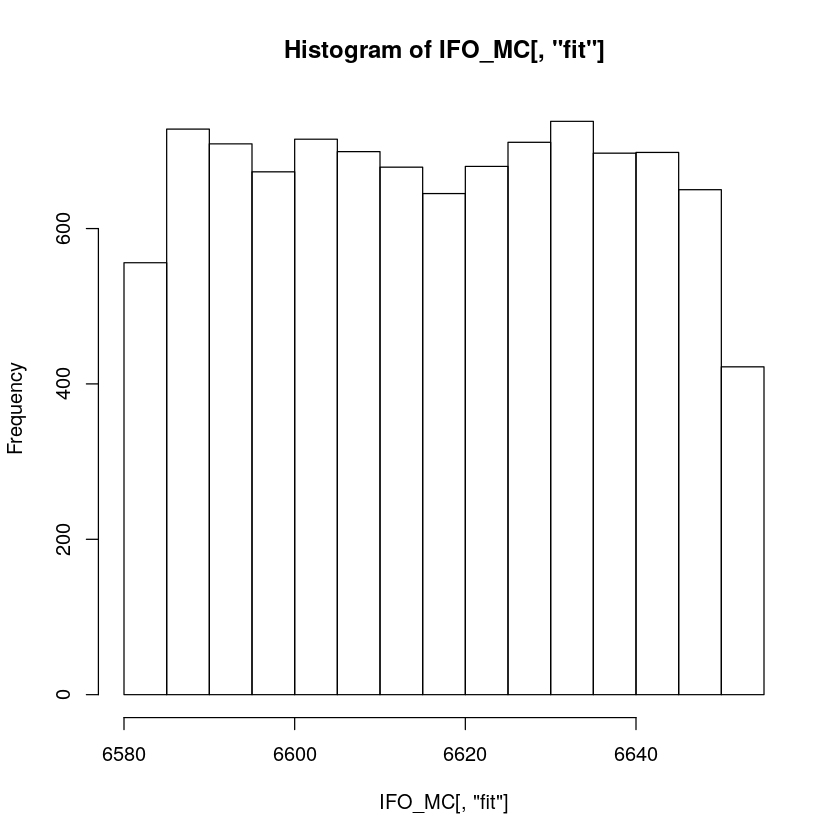

In [49]:
hist(IFO_MC[,"fit"]) # Yield difference due to change in inorganic F output

In [50]:
summary(IFO_MC)

      fit            lwr            upr      
 Min.   :6581   Min.   :6458   Min.   :6703  
 1st Qu.:6599   1st Qu.:6476   1st Qu.:6722  
 Median :6617   Median :6493   Median :6741  
 Mean   :6617   Mean   :6492   Mean   :6741  
 3rd Qu.:6635   3rd Qu.:6509   3rd Qu.:6760  
 Max.   :6653   Max.   :6525   Max.   :6781  

Not much change: no matter what inorganic F output we have, the yields will be 6580-6640 for the case when farmer has 3000 income and 1 sugar and 57 cereal

## What if we vary cereal?

In [51]:
cereal_range_2sd = c(mean(data$Cereal)-2*sd(data$Cereal),
                  mean(data$Cereal)+2*sd(data$Cereal))
cereal_range_2sd # No overdispersion this time

[1] 30.99612 81.94211

In [52]:
cereal_tests = runif(10000, cereal_range_2sd[1], cereal_range_2sd[2])
head(cereal_tests)

[1] 32.44909 57.38546 80.85914 66.26920 71.84702 55.12667

In [53]:
cereal_MC = predict(MyModel, data.frame(Farmer_income=3000, Sugar=1, Cereal=cereal_tests, Inorganic_F_output=254),
                 interval="confidence")
hist(cereal_MC[,"fit"])

In [54]:
summary(cereal_MC)

      fit            lwr            upr      
 Min.   :5790   Min.   :5472   Min.   :6109  
 1st Qu.:6181   1st Qu.:5987   1st Qu.:6374  
 Median :6572   Median :6449   Median :6694  
 Mean   :6581   Mean   :6380   Mean   :6782  
 3rd Qu.:6981   3rd Qu.:6791   3rd Qu.:7171  
 Max.   :7388   Max.   :7068   Max.   :7708  

We get much bigger variation! Not surprising as cereal has much more impact, looking at the model coefficients.

## What if we have interactions?

If we make the model nonlinear, we might get more interesting results.

In [55]:
NonlinearModel = lm(as.formula(paste("Yield~", paste(covars, collapse="*"))), data=data)
summary(NonlinearModel)


Call:
lm(formula = as.formula(paste("Yield~", paste(covars, collapse = "*"))), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6486.7 -1300.8  -304.3   879.5  9439.3 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    6.148e+03  5.010e+02  12.272
Farmer_income                                  3.005e-01  8.214e-02   3.659
Sugar                                          1.210e+03  2.408e+02   5.023
Cereal                                        -3.786e+01  7.989e+00  -4.740
Inorganic_F_output                            -5.467e+00  8.615e-01  -6.346
Farmer_income:Sugar                            3.050e-01  1.478e-01   2.063
Farmer_income:Cereal                           7.348e-03  1.598e-03   4.598
Sugar:Cereal                                  -1.617e+01  4.082e+00  -3.962
Farmer_income:Inorganic_F_output               5.758e-04  1.481e-04   3.888
Sugar:Inorganic_F_output         

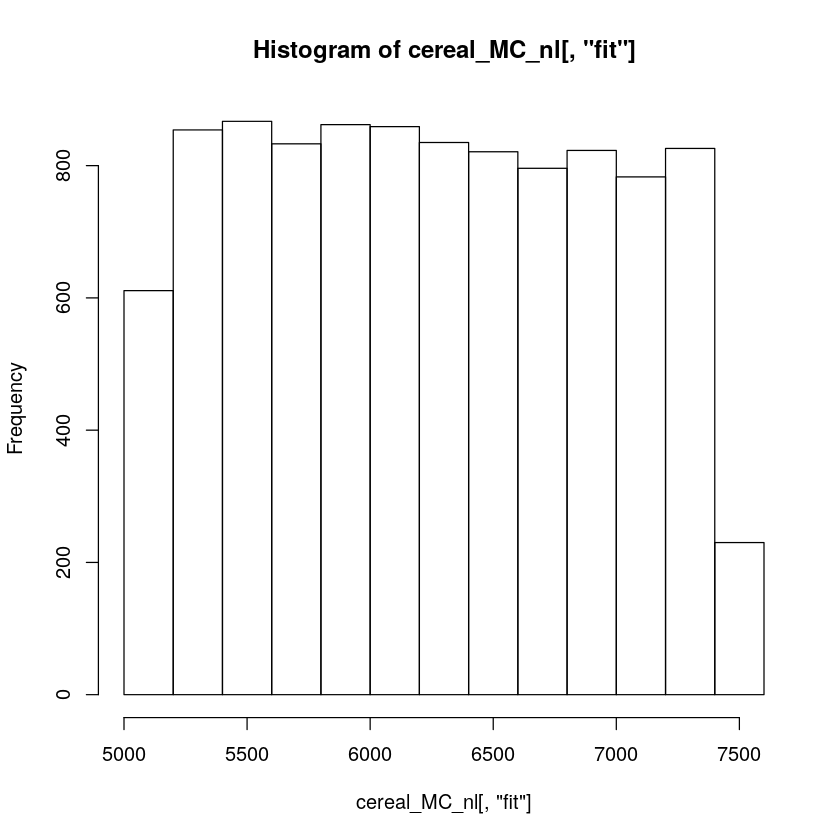

In [56]:
cereal_MC_nl = predict(NonlinearModel,
                       data.frame(Farmer_income=3000, Sugar=1, Cereal=cereal_tests, Inorganic_F_output=254),
                       interval="confidence")
hist(cereal_MC_nl[,"fit"])

In [57]:
# How about both IFO and cereal at the same time?
cereal_IFO_MC_nl = predict(NonlinearModel,
                       data.frame(Farmer_income=3000, Sugar=1, Cereal=cereal_tests, Inorganic_F_output=IFO_tests),
                       interval="confidence")
hist(cereal_IFO_MC_nl[,"fit"])

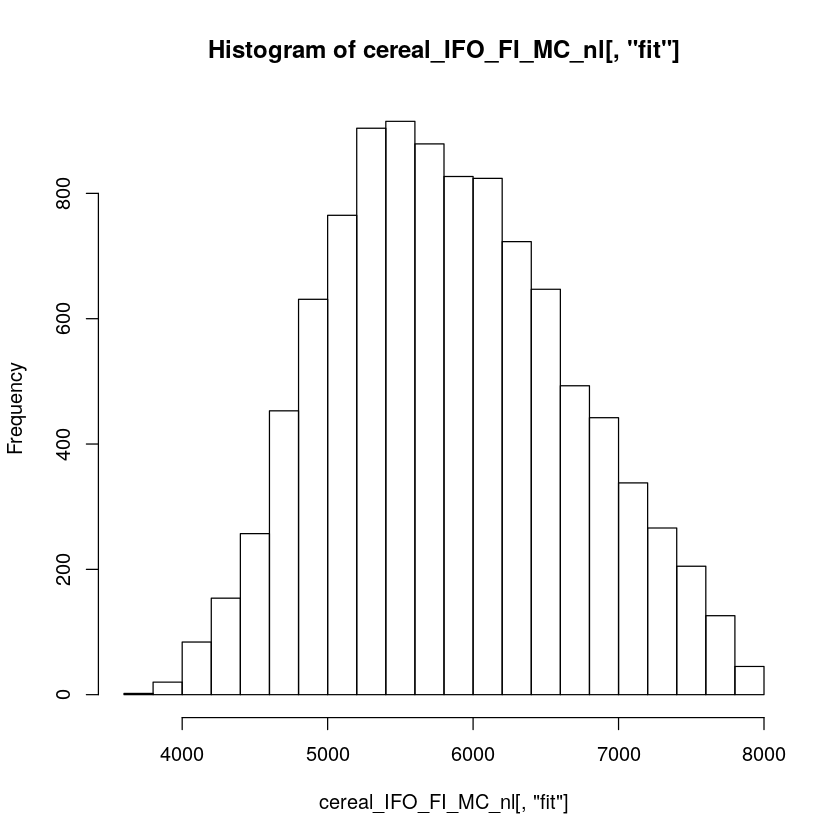

In [58]:
# Add also farmer income
FI_range = quantile(data$Farmer_income, c(0.25, 0.75))
FI_tests = runif(10000, FI_range[1], FI_range[2])
cereal_IFO_FI_MC_nl = predict(NonlinearModel,
                       data.frame(Farmer_income=FI_tests, Sugar=1, Cereal=cereal_tests, Inorganic_F_output=IFO_tests),
                       interval="confidence")
hist(cereal_IFO_FI_MC_nl[,"fit"])

Aha, now our distribution is different: if we vary both farmer income and cereal, we're most likely to have a yield of ~5500, but less likely more and less, and it's completely impossible to have yields above 8000 and below 4000 if our sugar is 1.